In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm as normal, binom
import bplot as bp
from scipy.optimize import minimize
from scipy.special import loggamma
import patsy
import multiprocessing
from joblib import Parallel, delayed

from math314 import optim, pbootstrap as bootstrap, adjustedR2 as ar2

# 21 November 2019

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/elmhurst.csv")

1. Loadable Module -- Import that 314
2. Correlation
3. $R^2$
4. Adjusted $R^2$
5. Hypothesis Testing
6. p-values

2. Correlation
    - Strength
    - Sign
    - Association
    - Linearity

3. Connection between correlation and $R^2$  
"What percent of the variance in Y is explained by X"

In [3]:
x = np.random.normal(size=101)
y = 1*x + np.random.normal(size=101)
df = pd.DataFrame({"x":x, "y":y})

In [4]:
r = df.corr()["y"][0]
r*r

0.4836336947923052

In [5]:
df.sort_values(by=["x"], inplace=True)
X = patsy.dmatrix("~ x", data=df)
yX = np.c_[df.y, X]
betahat = optim(yX)

In [6]:
N = yX.shape[0]
k = yX.shape[1]-1
mu = np.full(N, np.nan)
for n in range(N):
    mu[n] = np.sum(yX[n, 1:] * betahat)

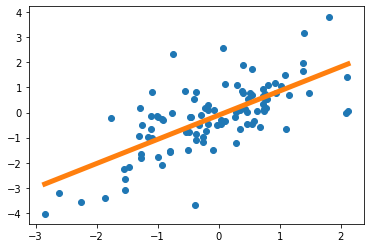

In [7]:
bp.point(df.x, df.y)
bp.line(df['x'], mu, color = bp.color[1], size=5)

We should think of $R^2$ a little different. It should be considered as what percentage of variance in y is explained by x?

In scenarios that there exists less than 100% correlation, there is some **error** that is unexplained solely by X.

In [8]:
error = df['y'] - mu
np.var(error) / np.var(df['y'])

0.5163663052076947

This is the percent of the unexplained portion of the model in Y. 1-this is just $R^2$

$R^2$ is guaranteed to go up even if you add another variable that doesn't explain Y.

## Adjusted $R^2$

In [10]:
1 - (np.var(error) / np.var(df['y'])) * (N-1)/(N-k)

def adjustedR2(y, mu, k):
    error = y - mu
    N= y.shape[0]
    return 1 - (np.var(error) / np.var(y)) * (N-1)/(N-k)

ar2(df.y, mu, k)

0.47841787352758114

Adjusted $R^2$ is inherently more conservative than $R^2$. It bounds can be negative. This basically means that you shouldn't base your y off of the explanatory variable x

## Hypothesis Testing
Ho: $\beta_1=0$

Hi: $\beta_1\neq 0$

To answer this, they turned to the sampling distribution of $\beta_1$

In [16]:
betas = bootstrap(yX, 1001, optim, betahat)

In [17]:
np.percentile(betas[:,1], [2.5, 97.5])

array([0.7197793 , 1.15356363])